In [1]:
import pandas as pd
import numpy as np 
import scipy as sc
import datetime
# Modelling Helpers
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve, cross_val_score


In [2]:
import sklearn as sk
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
# import library
from imblearn.under_sampling import RandomUnderSampler
import collections
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

## 0- Define functions 

In [3]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

### 1- Reading the dataset 

In [4]:
#piece 1
DF_CSV=pd.read_csv('Final.csv', sep=';')
DF_CSV=DF_CSV.drop('Unnamed: 0', axis=1)

In [5]:
DF_CSV.head(5)

,date,VIN,IIN,VOUT,VBATT,IBATT,TEMP,JP,CNT,STS,...,BRIGHTNESS,PAN1VOLT,PAN1CURR,BCK1VOLT,BCK1CURR,RSSI,host_id,time,Diff_V,Critical
0,2020-10-12,29238,610.0,28890.0,29138.0,579.0,215.0,OFF,563070.0,1.0,...,0.0,11916.0,505.0,24032.0,419.0,0.0,814U01M70009,00:00:47,100.0,No
1,2020-10-12,29237,641.0,28890.0,29132.0,613.0,220.0,OFF,563071.0,1.0,...,0.0,11916.0,510.0,24036.0,419.0,-89.0,814U01M70009,00:01:45,105.0,No
2,2020-10-12,29236,641.0,28890.0,29141.0,501.0,215.0,OFF,563072.0,1.0,...,0.0,11916.0,505.0,24036.0,419.0,-89.0,814U01M70009,00:02:44,95.0,No
3,2020-10-12,29238,610.0,28890.0,29131.0,553.0,215.0,OFF,563073.0,1.0,...,0.0,11916.0,505.0,24036.0,419.0,-89.0,814U01M70009,00:03:43,107.0,No
4,2020-10-12,29236,637.0,28848.0,29133.0,623.0,215.0,OFF,563074.0,1.0,...,0.0,11916.0,505.0,24036.0,419.0,-89.0,814U01M70009,00:04:42,103.0,No


# 1- Data analysis and manipulation

In [6]:
DF_CSV.info() # Gloabl information about my dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6226741 entries, 0 to 6226740
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   VIN           int64  
 2   IIN           float64
 3   VOUT          float64
 4   VBATT         float64
 5   IBATT         float64
 6   TEMP          float64
 7   JP            object 
 8   CNT           float64
 9   STS           float64
 10  MIN           float64
 11  POWER         float64
 12  AUTOBCKLIGHT  float64
 13  CURRLIGHT     float64
 14  BRIGHTNESS    float64
 15  PAN1VOLT      float64
 16  PAN1CURR      float64
 17  BCK1VOLT      float64
 18  BCK1CURR      float64
 19  RSSI          float64
 20  host_id       object 
 21  time          object 
 22  Diff_V        float64
 23  Critical      object 
dtypes: float64(18), int64(1), object(5)
memory usage: 1.1+ GB


In [7]:
DF_CSV.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VIN,6226741.0,16144.828844,14434.503505,-320.0,0.0,28941.0,29161.0,29551.0
IIN,6226727.0,693.650793,1545.978763,-78.0,0.0,592.0,654.0,9524.0
VOUT,6226713.0,27817.669405,1270.047974,19177.0,26524.0,27644.0,29097.0,30426.0
VBATT,6226712.0,27739.356894,1254.410267,19197.0,26427.0,27578.0,29033.0,29245.0
IBATT,6226711.0,675.229506,173.936978,360.0,576.0,619.0,707.0,2226.0
TEMP,6226707.0,218.284063,31.224505,130.0,200.0,215.0,235.0,445.0
CNT,6226705.0,324764.727654,181811.337682,1.0,155742.0,368145.0,481141.0,649333.0
STS,6226702.0,1.942965,1.036383,1.0,1.0,1.0,3.0,4.0
MIN,6226700.0,136.380203,203.685283,0.0,0.0,0.0,255.0,2160.0
POWER,6226699.0,18662.045061,4522.065008,0.0,16059.0,17105.0,19967.0,58695.0


In [8]:
DF_CSV.dtypes

date             object
VIN               int64
IIN             float64
VOUT            float64
VBATT           float64
IBATT           float64
TEMP            float64
JP               object
CNT             float64
STS             float64
MIN             float64
POWER           float64
AUTOBCKLIGHT    float64
CURRLIGHT       float64
BRIGHTNESS      float64
PAN1VOLT        float64
PAN1CURR        float64
BCK1VOLT        float64
BCK1CURR        float64
RSSI            float64
host_id          object
time             object
Diff_V          float64
Critical         object
dtype: object

In [9]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(dtf, col, max_cat=17):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

##### 1.1- Plot the heatMap of my dataframe 

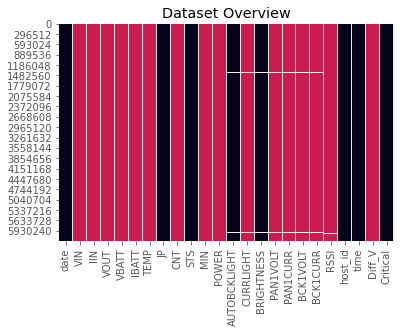

 Categerocial   Numeric   NaN 


In [10]:
dic_cols = {col:utils_recognize_type(DF_CSV, col, max_cat=20) for col in DF_CSV.columns}
heatmap = DF_CSV.isnull()
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

### 1.2-  Handling missing values ==> mapping nan to the mean of the column 

In [11]:
DF_CSV["VIN"] = DF_CSV["VIN"].fillna(DF_CSV["VIN"].mean())
DF_CSV["IIN"] = DF_CSV["IIN"].fillna(DF_CSV["IIN"].mean())
DF_CSV["VOUT"] = DF_CSV["VOUT"].fillna(DF_CSV["VOUT"].mean())
DF_CSV["VBATT"] = DF_CSV["VBATT"].fillna(DF_CSV["VBATT"].mean())
DF_CSV["IBATT"] = DF_CSV["IBATT"].fillna(DF_CSV["IBATT"].mean())
DF_CSV["TEMP"] = DF_CSV["TEMP"].fillna(DF_CSV["TEMP"].mean())
DF_CSV["CNT"] = DF_CSV["CNT"].fillna(DF_CSV["CNT"].mean())
DF_CSV["POWER"] = DF_CSV["POWER"].fillna(DF_CSV["POWER"].mean())
DF_CSV["BCK1CURR"] = DF_CSV["BCK1CURR"].fillna(DF_CSV["BCK1CURR"].mean())
DF_CSV["STS"] = DF_CSV["STS"].fillna(DF_CSV["STS"].mean())
DF_CSV["MIN"] = DF_CSV["MIN"].fillna(DF_CSV["MIN"].mean())
DF_CSV["CURRLIGHT"] = DF_CSV["CURRLIGHT"].fillna(DF_CSV["CURRLIGHT"].mean())
DF_CSV["BRIGHTNESS"] = DF_CSV["BRIGHTNESS"].fillna(DF_CSV["BRIGHTNESS"].mean())
DF_CSV["PAN1VOLT"] = DF_CSV["PAN1VOLT"].fillna(DF_CSV["PAN1VOLT"].mean())
DF_CSV["PAN1CURR"] = DF_CSV["PAN1CURR"].fillna(DF_CSV["PAN1CURR"].mean())
DF_CSV["BCK1VOLT"] = DF_CSV["BCK1VOLT"].fillna(DF_CSV["BCK1VOLT"].mean())
DF_CSV["RSSI"] = DF_CSV["RSSI"].fillna(DF_CSV["RSSI"].mean())
DF_CSV["Diff_V"] = DF_CSV["Diff_V"].fillna(DF_CSV["Diff_V"].mean())

###### Deleting the remaining nan rows 

In [12]:
DF_CSV=DF_CSV.dropna(axis=0)
DF_CSV=DF_CSV.reset_index(drop=True)
DF_CSV.isna().values.any() # verify if there is any na value 

False

### 1.3- Mapping Categorical data to numerical data 

In [13]:
##########################################
DF_CSV.JP = pd.Categorical(DF_CSV.JP)
DF_CSV['code_JP'] = DF_CSV.JP.cat.codes
##########################################
DF_CSV.host_id = pd.Categorical(DF_CSV.host_id)
DF_CSV['code_host_id'] = DF_CSV.host_id.cat.codes
#################################################
DF_CSV.time = pd.Categorical(DF_CSV.time)
DF_CSV['code_time'] = DF_CSV.time.cat.codes
##############################################
DF_CSV.date = pd.Categorical(DF_CSV.date)
DF_CSV['code_date'] = DF_CSV.date.cat.codes
###############################################
DF_CSV.Critical = pd.Categorical(DF_CSV.Critical)
DF_CSV['code_Critical'] = DF_CSV.Critical.cat.codes

In [14]:
DF_CSV['code_Critical']

0          0
1          0
2          0
3          0
4          0
          ..
6188922    0
6188923    0
6188924    0
6188925    0
6188926    0
Name: code_Critical, Length: 6188927, dtype: int8

In [ ]:
DF_CSV.columns

In [ ]:
My_column=['VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'CNT','STS', 'MIN', 'POWER', 'AUTOBCKLIGHT', 'CURRLIGHT', 'BRIGHTNESS',
       'PAN1VOLT', 'PAN1CURR', 'BCK1VOLT', 'BCK1CURR', 'RSSI', 'code_JP', 'code_host_id', 'code_time', 'code_date',
       'code_Critical']
#Select only the mentioned columns below 
DF_CSV=DF_CSV[My_column]

### 1.4- Splitting my dataset to train and test 

In [ ]:
# Shuffling the data 
DF_CSV = DF_CSV.sample(frac=1).reset_index(drop=True)

In [ ]:
X=DF_CSV.iloc[:,:22].values
y=DF_CSV.iloc[:,22].values

### Scaling the data  ==> IN OUR CASE WAS NOT A GOOD IDEA 

In [ ]:
# #In general a good idea is to scale the data
# scaler = StandardScaler()
# scaler.fit(data_rus)
# data_rus=scaler.transform(data_rus) 


In [ ]:
# Spliting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('X train:',len(X_train))
print('y train:', len(y_train))
print('X test:', len(X_test))
print('y test:', len(y_test))


### 1.5- Class balance

In [ ]:
ax = DF_CSV['code_Critical'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle('Critical', fontsize=20)
plt.show()

#### Random under-sampling with imblearn

In [ ]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
data_rusTrain, target_rusTrain = rus.fit_resample(X_train, y_train)
print('original dataset shape:', collections.Counter(y_train))
print('Resample dataset shape:', collections.Counter(target_rusTrain))
len(data_rusTrain)

In [ ]:
X_test.shape[0]

# 2- Machine Learning application 

### 2.1- Decision tree (albero decisionale)

In [ ]:
feat_names=['VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'CNT', 'STS', 'MIN', 'POWER', 'AUTOBCKLIGHT', 'CURRLIGHT', 'BRIGHTNESS', 'PAN1VOLT',
       'PAN1CURR', 'BCK1VOLT', 'BCK1CURR', 'RSSI', 'code_JP', 'code_host_id','code_time', 'code_date']

target_names=['yes', 'no']

In [ ]:
len(feat_names)

In [ ]:
clf=tree.DecisionTreeClassifier("entropy",random_state = 0) # implementation of the hierarchical/decision trees
clf.fit(data_rusTrain, target_rusTrain)
y_predDT=clf.predict(X_test)

print('features importance')
for name, importance in zip(feat_names, clf.feature_importances_):
    print(name, importance)

In [ ]:
# The score method returns the accuracy of the model
accuracy_score(y_test,clf.predict(X_test))

In [ ]:
data_rusTrain

In [ ]:
clf.score(data_rusTrain, target_rusTrain)

In [ ]:
# confusion matrix 
print(confusion_matrix(y_test,y_predDT))
print(classification_report(y_test, y_predDT))

In [ ]:
f_importances(clf.feature_importances_, feat_names)

In [ ]:
plt.figure()    
plt.plot(feat_names,clf.feature_importances_, 'b*')
plt.xlabel('Feature number')
plt.ylabel('Information Gain')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [ ]:
dotfile = open("Tree2.dot", 'w')
dot_data=tree.export_graphviz(clf, out_file=dotfile,feature_names= feat_names,
    class_names=target_names, filled= True, rounded= True, special_characters=True)
dotfile.close()

In [ ]:
# List of values to try for max_depth:
max_depth_range = range(1, 24,1)
# List to store the average RMSE for each value of max_depth:
test_accuracy = []
train_accuracy = []
for depth in max_depth_range:
    
    clf = tree.DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    test_accuracy.append(score)
    score1 = clf.score(X_train, y_train)
    train_accuracy.append(score1)

In [ ]:
plt.plot(max_depth_range, test_accuracy,'b', label='Testing')
plt.plot(max_depth_range, train_accuracy,'r', label='Training')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
param_range=np.arange(1, 22)
train_scores, valid_scores = validation_curve(tree.DecisionTreeClassifier(), data_rus, target_rus, param_name="max_depth",param_range=param_range,cv=5)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)
plt.figure(figsize=(5,5))
plt.title("Validation Curve with DecisionTree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.975, 1.005)
#plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, train_scores_mean, label="Training score",
             color="r")
#plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="g")

plt.legend(loc="best")
plt.xticks(param_range)
plt.savefig('DSSE.jpg')
plt.show()

###### le caratteristiche più importanti nella classificazione sono rispettivamente: IIN,  VBATT , VIN 

### 2.2- Logistic Regression

In [ ]:
LR = LogisticRegression(random_state=50, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_predLR=LR.predict(X_test)

In [ ]:
LR_score = LR.score(X_test, y_test)
print(LR_score)

In [ ]:
LR.score(X_train, y_train)

In [ ]:
accuracy_score(y_test, y_predLR)

In [ ]:
# confusion matrix 
print(confusion_matrix(y_test,y_predLR))
print(classification_report(y_test, y_predLR))

In [ ]:
f_importances(LR.coef_[0], feat_names)

In [ ]:
print('features importance')
for name, importance in zip(feat_names, LR.coef_[0]):
    print(name, importance)

In [ ]:
param_range1 = [0.1, 0.2, 0.3, 0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_range1   1000

In [ ]:
train_scores1, valid_scores1 = validation_curve(LogisticRegression(random_state=50, solver='lbfgs', multi_class='ovr'), data_rus, target_rus, param_name="C",param_range=param_range1,cv=5)

In [ ]:
train_scores_mean1 = np.mean(train_scores1, axis=1)
train_scores_std1 = np.std(train_scores1, axis=1)
test_scores_mean1 = np.mean(valid_scores1, axis=1)
test_scores_std1 = np.std(valid_scores1, axis=1)
plt.figure(figsize=(5,5))
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.998475, 0.9986)
#plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range1, train_scores_mean1, label="Training score",
             color="r")
#plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.plot(param_range1, test_scores_mean1, label="Cross-validation score",
             color="g")

plt.legend(loc="best")
plt.xticks(param_range1)
plt.savefig('LR.jpg')
plt.show()

# 3- Support Vector Machine 

In [ ]:
svclassifier=SVC(kernel='linear',random_state=50)
# train the classifier
svclassifier.fit(X_train,y_train)

In [ ]:
y_predSVM=svclassifier.predict(X_test)

In [ ]:
svclassifier.score(X_train, y_train)

In [ ]:
svclassifier.score(X_test, y_test)

In [ ]:
accuracy_score(y_test, y_predSVM)

In [ ]:
accuracy_score(y_test, y_predSVM)

In [ ]:
svclassifier.coef_[0]

#### Plot the features important in the classification process 

In [ ]:
f_importances(svclassifier.coef_[0], feat_names)

In [ ]:
print('features importance')
for name, importance in zip(feat_names, svclassifier.coef_[0]):
    print(name, importance)

#### Extracting the faeture importance using PCA 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
data=DF_CSV.iloc[:,:22]
Xreduced = pca.fit_transform(data)

In [ ]:
feat_names

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [My_column[most_important[i]] for i in range(n_pcs)]
most_important_names

In [ ]:
print(abs( pca.components_ ))